In [1]:
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, auc, log_loss
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
# Acessar o patch anterior ao patch do código e acessar a pasta "data"
PATH = os.path.join(os.path.dirname(os.getcwd()), "data")

In [3]:
# Funcao que carrega treino e teste da pasta anterior
# No meu PC eu deixo a pasta separada em models e data
def load_train_test_data(path=PATH):
    train_path = os.path.join(path, "train.csv")
    test_path = os.path.join(path, "test.csv")
    return pd.read_csv(train_path), pd.read_csv(test_path)

In [4]:
# Carregar o csv de treino e teste
train, test = load_train_test_data(PATH)

In [5]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
train.shape

(15120, 56)

In [7]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [9]:
variables = train.drop("Cover_Type", axis=1)
var_resp = train["Cover_Type"].copy()

In [10]:
# Quebrar a base de treino em treino e teste pois só ela tem a variável resposta
x_train, x_test, y_train, y_test = train_test_split(variables, var_resp, test_size=0.2, random_state=2)

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 14492 to 7336
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  12096 non-null  int64
 1   Elevation                           12096 non-null  int64
 2   Aspect                              12096 non-null  int64
 3   Slope                               12096 non-null  int64
 4   Horizontal_Distance_To_Hydrology    12096 non-null  int64
 5   Vertical_Distance_To_Hydrology      12096 non-null  int64
 6   Horizontal_Distance_To_Roadways     12096 non-null  int64
 7   Hillshade_9am                       12096 non-null  int64
 8   Hillshade_Noon                      12096 non-null  int64
 9   Hillshade_3pm                       12096 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  12096 non-null  int64
 11  Wilderness_Area1                    12096 non-null  int64
 12  W

In [12]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 12224 to 1404
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  3024 non-null   int64
 1   Elevation                           3024 non-null   int64
 2   Aspect                              3024 non-null   int64
 3   Slope                               3024 non-null   int64
 4   Horizontal_Distance_To_Hydrology    3024 non-null   int64
 5   Vertical_Distance_To_Hydrology      3024 non-null   int64
 6   Horizontal_Distance_To_Roadways     3024 non-null   int64
 7   Hillshade_9am                       3024 non-null   int64
 8   Hillshade_Noon                      3024 non-null   int64
 9   Hillshade_3pm                       3024 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  3024 non-null   int64
 11  Wilderness_Area1                    3024 non-null   int64
 12  Wi

In [13]:
y_train.unique()

array([7, 1, 5, 3, 4, 2, 6], dtype=int64)

In [14]:
# Feature engineering:
# Hypotenuse_Distance_To_Hydrology - sqrt((Horizontal_Distance_To_Hydrology)^2 + (Vertical_Distance_To_Hydrology)^2) using Pythagoras's theorem
# Hillshade_Mean - (Hillshade_9am + Hillshade_Noon + Hillshade_3pm)/3
# Is_Extremely_Stony - if Type_Soil 1, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40 then 1 else 0
# Is_Very_Stony - if Type_Soil 2, 9, 18, 26 then 1 else 0
# Is_Rubbly - if Type_Soil 3, 4, 5, 10, 11, 13, 22 then 1 else 0
def add_features(data):
    data["Hypotenuse_Distance_To_Hydrology"] = np.sqrt(data["Horizontal_Distance_To_Hydrology"]**2 + data["Vertical_Distance_To_Hydrology"]**2)
    data["Hillshade_Mean"] = (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"])/3
    data["Is_Extremely_Stony"] = np.where((data["Soil_Type1"]==1) | (data["Soil_Type24"]==1)
                                          | (data["Soil_Type25"]==1) | (data["Soil_Type27"]==1)
                                          | (data["Soil_Type28"]==1) | (data["Soil_Type29"]==1)
                                          | (data["Soil_Type30"]==1) | (data["Soil_Type31"]==1)
                                          | (data["Soil_Type32"]==1) | (data["Soil_Type33"]==1)
                                          | (data["Soil_Type34"]==1) | (data["Soil_Type36"]==1)
                                          | (data["Soil_Type37"]==1) | (data["Soil_Type38"]==1)
                                          | (data["Soil_Type39"]==1) | (data["Soil_Type40"]==1), 1, 0)
    data["Is_Very_Stony"] = np.where((data["Soil_Type2"]==1) | (data["Soil_Type9"]==1)
                                    | (data["Soil_Type18"]==1) | (data["Soil_Type26"]==1), 1, 0)
    data["Is_Rubbly"] = np.where((data["Soil_Type3"]==1) | (data["Soil_Type4"]==1)
                                    | (data["Soil_Type5"]==1) | (data["Soil_Type10"]==1)
                                    | (data["Soil_Type11"]==1) | (data["Soil_Type13"]==1)
                                    | (data["Soil_Type22"]==1), 1, 0)
    
#     https://towardsdatascience.com/predicting-forest-cover-types-with-the-machine-learning-workflow-1f6f049bf4df
    data['Mean_Elevation_Vertical_Distance_Hydrology'] = (data['Elevation'] + data['Vertical_Distance_To_Hydrology'])/2
    data['Mean_Distance_Hydrology_Firepoints'] = (data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Fire_Points'])/2
    data['Mean_Distance_Hydrology_Roadways'] = (data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways'])/2
    data['Mean_Distance_Firepoints_Roadways'] = (data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Roadways'])/2
    return data

In [15]:
x_train = add_features(x_train)
x_test = add_features(x_test)

<ipython-input-14-6b75c034db2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hypotenuse_Distance_To_Hydrology"] = np.sqrt(data["Horizontal_Distance_To_Hydrology"]**2 + data["Vertical_Distance_To_Hydrology"]**2)
<ipython-input-14-6b75c034db2c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hillshade_Mean"] = (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"])/3
<ipython-input-14-6b75c034db2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [16]:
# Aqui aplico um Pipeline para padronizar a escala nos dados numericos
# Como nao temos missings e dados categorios, nao preciso me preocupar com essa parte

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

In [17]:
# Como todas as variáveis são númericas, apenas selecionamos todas as vars
num_attribs = x_train.columns.tolist()

In [18]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

In [19]:
# Aplico o Pipeline no treino e no teste
train_prepared = full_pipeline.fit_transform(x_train)

In [20]:
train_prepared

array([[ 1.59787741,  1.39829724, -1.3708379 , ...,  0.81920754,
         1.04856178,  0.91440987],
       [-0.21650888,  1.21842893, -0.9333866 , ...,  0.88693614,
         0.21648572,  0.51336412],
       [-1.37584059, -0.08141936, -0.80579664, ...,  0.35292218,
        -1.31620994, -0.45917181],
       ...,
       [-0.20754498,  1.65251111,  1.41791413, ...,  0.30950641,
         1.08395391,  0.85902736],
       [-1.14117015, -1.69783586, -0.86959162, ..., -0.9495509 ,
        -0.85611233, -0.87119857],
       [-0.04688422, -0.40758055,  0.23315019, ..., -0.07949888,
        -0.54408381, -0.45869437]])

In [21]:
train_prepared.shape

(12096, 64)

In [22]:
test_prepared = full_pipeline.transform(x_test)

In [23]:
test_prepared

array([[ 1.07659186,  0.01211216, -0.20430111, ..., -1.05635369,
        -0.88428157, -1.1156455 ],
       [-1.60453508,  0.24474184, -0.45036746, ...,  1.22818409,
         0.66285986,  0.89292527],
       [ 0.73435457, -0.63781198, -0.15873326, ..., -0.81062044,
        -0.95795497, -0.8621273 ],
       ...,
       [-0.31672074, -0.77211365, -0.97895445, ...,  0.00385939,
        -0.67048425, -0.57375631],
       [ 1.17473513, -1.73141128, -0.86959162, ..., -1.0624319 ,
        -1.20931128, -1.16673109],
       [-1.41031714,  1.14648161,  1.56373122, ...,  0.26522233,
         2.96840395,  2.08890098]])

## Melhorando o desempenho com gridsearch e cross validation

In [32]:
# Rodar o gridSearch para Logistica.
# https://stackoverflow.com/a/45335434
class_weight_options = [None, 'balanced']
C_options = [0.001, 0.009, 0.01, 0.09, 0.1, 0.5, 1, 3, 5, 10, 50]
max_iter_options = [500, 700, 1000]

param_grid = dict(class_weight = class_weight_options, C = C_options, max_iter = max_iter_options)

log_reg = LogisticRegression(multi_class='ovr')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)
grid_search = grid_search.fit(train_prepared, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 22.3min finished


In [33]:
grid_search.best_params_

{'estimator__C': 10,
 'estimator__class_weight': None,
 'estimator__max_iter': 500}

In [34]:
model = grid_search.best_estimator_

In [35]:
grid_search.best_estimator_.score(train_prepared, y_train)

0.6798941798941799

In [36]:
y_train_estimation = model.predict(train_prepared)
y_test_estimation = model.predict(test_prepared)

y_train_score = model.predict_proba(train_prepared)[:,1]
y_test_score = model.predict_proba(test_prepared)[:,1]

In [37]:
train_report = classification_report(y_train, y_train_estimation, digits=4)
print("Train:\n",train_report)

test_report = classification_report(y_test, y_test_estimation, digits=4)
print("Test:\n",test_report)

Train:
               precision    recall  f1-score   support

           1     0.6409    0.6309    0.6359      1723
           2     0.5926    0.4980    0.5412      1741
           3     0.5927    0.5638    0.5779      1740
           4     0.7989    0.8887    0.8414      1734
           5     0.6415    0.7125    0.6752      1708
           6     0.5868    0.5834    0.5851      1721
           7     0.8751    0.8832    0.8791      1729

    accuracy                         0.6799     12096
   macro avg     0.6755    0.6801    0.6765     12096
weighted avg     0.6755    0.6799    0.6765     12096

Test:
               precision    recall  f1-score   support

           1     0.6396    0.6499    0.6447       437
           2     0.5387    0.4654    0.4994       419
           3     0.5810    0.5381    0.5587       420
           4     0.7705    0.8826    0.8228       426
           5     0.6550    0.7058    0.6794       452
           6     0.5948    0.5718    0.5830       439
         

In [38]:
y_predicted = grid_search.decision_function(test_prepared)

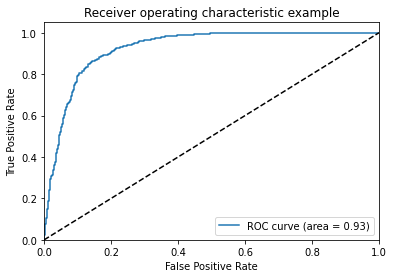

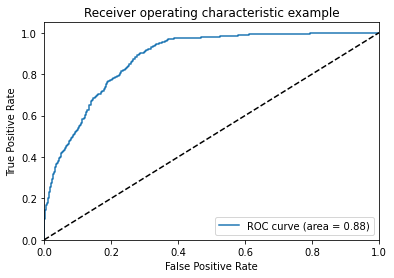

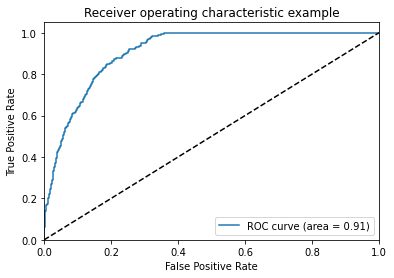

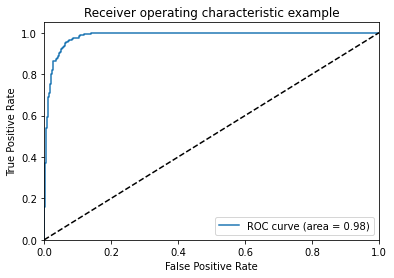

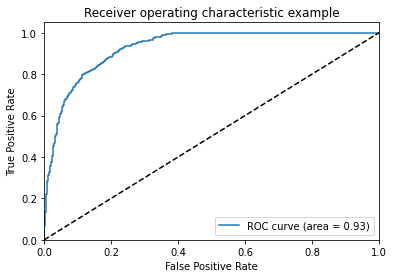

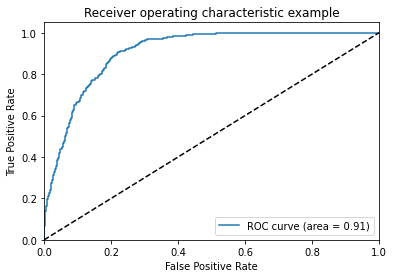

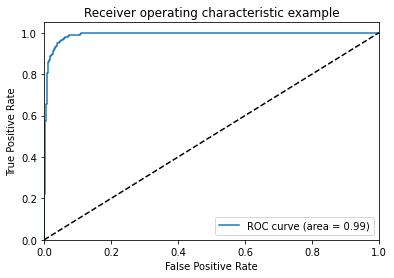

In [39]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(len(y_test.unique())):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_dummies[:, i], y_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(y_test.unique())):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [40]:
test = add_features(test)

In [41]:
# Aplicamos as mesmas mudanças que fizemos no treino, para o teste do Kaggle
final_test = full_pipeline.transform(test)

In [42]:
final_test

array([[ 1.74221926e+00, -1.65357898e-01,  1.80068401e+00, ...,
         4.25773647e+00,  5.35737126e-01,  2.91199963e+00],
       [ 1.74244910e+00, -1.58163165e-01, -1.42551931e+00, ...,
         4.28378593e+00,  5.14068478e-01,  2.91199963e+00],
       [ 1.74267895e+00, -8.62158433e-02, -1.27970221e+00, ...,
         3.99637354e+00,  7.49534447e-01,  2.90961245e+00],
       ...,
       [ 1.31808250e+02, -8.70441654e-01,  2.35381118e-02, ...,
        -7.18579006e-01, -1.29454130e+00, -1.09129629e+00],
       [ 1.31808480e+02, -8.75238142e-01,  1.23787368e-01, ...,
        -7.09895852e-01, -1.29454130e+00, -1.08652194e+00],
       [ 1.31808709e+02, -8.77636386e-01,  7.82195241e-02, ...,
        -7.00344383e-01, -1.31115393e+00, -1.09225116e+00]])

In [43]:
final_test.shape

(565892, 64)

In [44]:
# Aplicamos o modelo
y_predicted_test = grid_search.predict(final_test)

In [45]:
y_predicted_test.shape

(565892,)

In [46]:
np.unique(y_predicted_test)

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [47]:
test_ID = test['Id'].copy()

In [48]:
dataset = pd.DataFrame({'Id': test_ID, 'Cover_Type': y_predicted_test})

In [49]:
dataset.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [51]:
dataset.to_csv(os.path.join(PATH, "logreg_output.csv"), sep=",", index=False)